<a href="https://colab.research.google.com/github/sharadnatarajSJSU/Eluvio/blob/main/Eluvio_WandB_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb --upgrade

     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 181 kB 52.8 MB/s 
     |████████████████████████████████| 144 kB 11.7 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=697305d19aadd7b1bfdbbca6552ac7666d2f36936e6a98390d9dd5192f611da0
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [2]:
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import random


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_folder='/content/drive/MyDrive/SJSU assignment Docs/Eluvio Challange/Train'
test_folder = '/content/drive/MyDrive/SJSU assignment Docs/Eluvio Challange/Test'

In [5]:
classes = ['Acura',
 'Audi',
 'BMW',
 'Chevrolet',
 'Ford',
 'Honda',
 'Hyundai',
 'Infiniti',
 'KIA',
 'Lamborghini',
 'Lexus',
 'Mazda',
 'MercedesBenz',
 'Nissan',
 'Porsche',
 'Tesla',
 'Toyota',
 'Volkswagen']

In [6]:
class_dict = {'Acura': 0,
 'Audi': 1,
 'BMW': 2,
 'Chevrolet': 3,
 'Ford': 4,
 'Honda': 5,
 'Hyundai': 6,
 'Infiniti': 7,
 'KIA': 8,
 'Lamborghini': 9,
 'Lexus': 10,
 'Mazda': 11,
 'MercedesBenz': 12,
 'Nissan': 13,
 'Porsche': 14,
 'Tesla': 15,
 'Toyota': 16,
 'Volkswagen': 17}

In [7]:
def load_images_and_labels(data_path, cates): 
  X = []
  y = []
  i = 0
  for  cate in cates: 
    for img_name in os.listdir(data_path + '/'+ cate + '/'):
      i = i +1
      print(i)
      img = cv2.imread(data_path + '/' + cate + '/' + img_name)
      if img is not None: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((227,227))
        # convert the image to array
        img_rs = np.array(img_rs)
      
        X.append(img_rs)
        y.append(class_dict[cate])
  return X, y

In [8]:
X_train, y_train = load_images_and_labels(train_folder, classes)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [9]:
X_test, y_test = load_images_and_labels(test_folder, classes)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105


In [10]:
keylist = list(class_dict.keys())

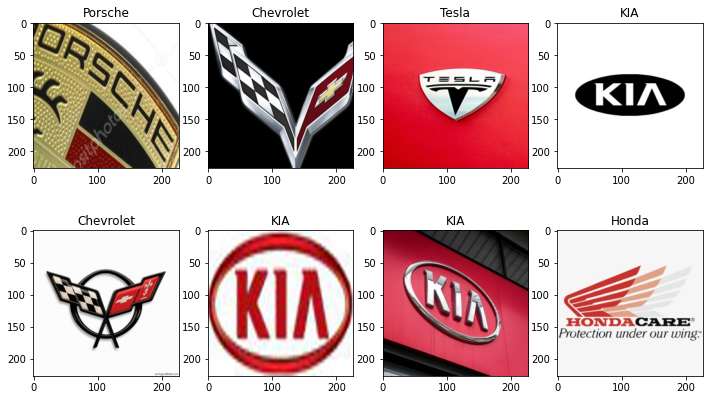

In [11]:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(keylist[y_train[ind]])

In [12]:
from tensorflow.keras.utils import to_categorical

def preprocess_data(X, y):
  # convert X from list to array
  X = np.array(X)
  y = np.array(y)

  y = to_categorical(y)
  # convert integer values of X into floats
  X = X.astype(np.float32)

  # normalization 
  X = X/255.0
  
  return X, y

In [13]:
(X_train, y_train) = preprocess_data(X_train, y_train)
(X_test, y_test) = preprocess_data(X_test, y_test)

Splitting data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [16]:
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [96]:
sweep_config = {
    'method': 'random'
    }

In [97]:
metric = {
    'name': 'categorical_crossentropy',
    'goal': 'minimize'   
    }

sweep_config['metric'] = metric

In [98]:
parameters_dict = {
    'optimizer': {
        'values': ['sgd','rmsprop']
        },
    
    'dropout': {
          'values': [0.3, 0.4, 0.5]
        },
    }

sweep_config['parameters'] = parameters_dict

In [99]:
parameters_dict.update({
    'epochs': {
        'values': [25,50,100]}
    })

In [100]:
parameters_dict.update({
    'learning_rate': {
        # a flat distribution between 0 and 0.1
        'distribution': 'uniform',
        'min': 0.000001,
        'max': 0.001
      },
    })
    

In [101]:
parameters_dict.update({
    'layer1' : {'values' : [32,64]}
})

In [102]:
parameters_dict.update({
    'layer2' : {'values' : [128,256]}
})

In [103]:
parameters_dict.update({
    'layer3' : {'values' : [256,512]}
})

In [104]:
parameters_dict.update({
    'layer4' : {'values' : [256,512]}
})

In [105]:
parameters_dict.update({
    'Dense1' : {'values' : [2048,4096]}
})

In [106]:
parameters_dict.update({
    'Dense2' : {'values' : [2048,4096]}
})

In [107]:
parameters_dict.update({
    'batch_size': {
        # integers between 32 and 256
        # with evenly-distributed logarithms 
        'distribution': 'q_log_uniform_values',
        'q': 8,
        'min': 32,
        'max': 256,
      }
})

In [108]:
import pprint

pprint.pprint(sweep_config)

{'method': 'random',
 'metric': {'goal': 'minimize', 'name': 'categorical_crossentropy'},
 'parameters': {'Dense1': {'values': [2048, 4096]},
                'Dense2': {'values': [2048, 4096]},
                'batch_size': {'distribution': 'q_log_uniform_values',
                               'max': 256,
                               'min': 32,
                               'q': 8},
                'dropout': {'values': [0.3, 0.4, 0.5]},
                'epochs': {'values': [25, 50, 100]},
                'layer1': {'values': [32, 64]},
                'layer2': {'values': [128, 256]},
                'layer3': {'values': [256, 512]},
                'layer4': {'values': [256, 512]},
                'learning_rate': {'distribution': 'uniform',
                                  'max': 0.001,
                                  'min': 1e-06},
                'optimizer': {'values': ['sgd', 'rmsprop']}}}


In [109]:
sweep_id = wandb.sweep(sweep_config, project="pytorch-sweeps-demo")

Create sweep with ID: nr6nr549
Sweep URL: https://wandb.ai/sharadnataraj/pytorch-sweeps-demo/sweeps/nr6nr549


In [67]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import gradient_descent_v2,adam_v2
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras.regularizers import l2
from keras.initializers import RandomNormal, VarianceScaling

Augmentation

In [32]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
datagen = ImageDataGenerator(
    # featurewise_center=False,
    # samplewise_center=False,
    # featurewise_std_normalization=True,
    # samplewise_std_normalization=True,
    # zca_whitening=True,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

In [53]:
from keras.callbacks import History 
history = History()

In [63]:
def train(config=None):
    # Initialize a new wandb run
    with wandb.init(config=config):
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        
        network = build_network(config.layer1,config.layer2,config.layer3,config.layer4,config.Dense1,config.Dense2, config.dropout)
        optimizer = build_optimizer(network, config.optimizer, config.learning_rate)
        batch_size = config.batch_size

        
        it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
        steps = X_train.shape[0]//batch_size
        network.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

        history = network.fit_generator(it_train,epochs = config.epochs,
                                      validation_data = (X_test, y_test), verbose = 1, 
                                      )
            # Evaluating the model
        _,acc = network.evaluate(X_test, y_test, verbose = 1)
        print('%.3f' % (acc * 100))
        wandb.log({"batch loss": histroy.loss})
    

  

In [35]:
def build_network(layer1,layer2,layer3,layer4,dense1,dense2,dropout):
    model = Sequential()
    model.add(Conv2D(layer1, (3,3),
                    input_shape=(227,227,3),
                    padding='valid',
                    bias_initializer='glorot_uniform',
                    kernel_regularizer=l2(0.00004),
                    kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(layer2, (3,3),
                    padding='valid',
                    bias_initializer='glorot_uniform',
                    kernel_regularizer=l2(0.00004),
                    kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(layer3, (3,3),
                    padding='valid',
                    bias_initializer='glorot_uniform',
                    kernel_regularizer=l2(0.00004),
                    kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(layer4, (3,3),
                    padding='valid',
                    bias_initializer='glorot_uniform',
                    kernel_regularizer=l2(0.00004),
                    kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(dense1, activation='relu', bias_initializer='glorot_uniform'))
    model.add(Dropout(dropout))

    model.add(Dense(dense2, activation='relu', bias_initializer='glorot_uniform'))
    model.add(Dropout(dropout))

    # final activation is softmax, tuned to the number of classes/labels possible
    model.add(Dense(18, activation='softmax'))

    return model

In [68]:
def build_optimizer(network, optimizer, learning_rate):
    if optimizer == "sgd":
        optimizer = gradient_descent_v2.SGD(lr=learning_rate, momentum=0.9)
    elif optimizer == "adam":
        optimizer = adam_v2.Adam(lr=learning_rate)
    elif optimizer =="rmsprop":
      optimizer = RMSprop(learning_rate=learning_rate,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,)
    return optimizer

In [110]:
wandb.agent(sweep_id, train, count=10)

wandb: Agent Starting Run: m2kiguhe with config:
wandb: 	Dense1: 4096
wandb: 	Dense2: 2048
wandb: 	batch_size: 192
wandb: 	dropout: 0.4
wandb: 	epochs: 100
wandb: 	layer1: 64
wandb: 	layer2: 128
wandb: 	layer3: 512
wandb: 	layer4: 512
wandb: 	learning_rate: 0.0007114410657956689
wandb: 	optimizer: rmsprop


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100



wandb: ERROR Run m2kiguhe errored: ResourceExhaustedError()
wandb: Agent Starting Run: 65ylhbij with config:
wandb: 	Dense1: 4096
wandb: 	Dense2: 2048
wandb: 	batch_size: 56
wandb: 	dropout: 0.3
wandb: 	epochs: 25
wandb: 	layer1: 64
wandb: 	layer2: 256
wandb: 	layer3: 256
wandb: 	layer4: 256
wandb: 	learning_rate: 0.00017791140376251778
wandb: 	optimizer: rmsprop


Epoch 1/25
14/14 [==============================] - 16s 889ms/step - loss: 9.0665 - categorical_accuracy: 0.0732 - val_loss: 2.9245 - val_categorical_accuracy: 0.0762
Epoch 2/25
14/14 [==============================] - 10s 702ms/step - loss: 2.8934 - categorical_accuracy: 0.1216 - val_loss: 3.0188 - val_categorical_accuracy: 0.0762
Epoch 3/25
 7/14 [==============>...............] - ETA: 4s - loss: 2.8677 - categorical_accuracy: 0.0938


wandb: ERROR Run 65ylhbij errored: ResourceExhaustedError()
wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rdx9ssxz with config:
wandb: 	Dense1: 2048
wandb: 	Dense2: 4096
wandb: 	batch_size: 112
wandb: 	dropout: 0.4
wandb: 	epochs: 50
wandb: 	layer1: 32
wandb: 	layer2: 128
wandb: 	layer3: 512
wandb: 	layer4: 512
wandb: 	learning_rate: 0.0007054349762786965
wandb: 	optimizer: sgd


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
7/7 [==============================] - 15s 2s/step - loss: 3.3762 - categorical_accuracy: 0.0575 - val_loss: 3.0898 - val_categorical_accuracy: 0.0381
Epoch 2/50
7/7 [==============================] - 10s 1s/step - loss: 3.1764 - categorical_accuracy: 0.0431 - val_loss: 2.9714 - val_categorical_accuracy: 0.0952
Epoch 3/50
7/7 [==============================] - 10s 1s/step - loss: 3.0575 - categorical_accuracy: 0.0510 - val_loss: 2.9641 - val_categorical_accuracy: 0.1048
Epoch 4/50
7/7 [==============================] - 10s 1s/step - loss: 2.9775 - categorical_accuracy: 0.0797 - val_loss: 2.9723 - val_categorical_accuracy: 0.0857
Epoch 5/50
7/7 [==============================] - 10s 1s/step - loss: 2.9792 - categorical_accuracy: 0.0810 - val_loss: 2.9604 - val_categorical_accuracy: 0.1333
Epoch 6/50
7/7 [==============================] - 10s 1s/step - loss: 2.9510 - categorical_accuracy: 0.1046 - val_loss: 2.9508 - val_categorical_accuracy: 0.0762
Epoch 7/50
7/7 [============

batch loss,▁
batch loss,0.19048


wandb: Agent Starting Run: 3bl5yp68 with config:
wandb: 	Dense1: 4096
wandb: 	Dense2: 2048
wandb: 	batch_size: 64
wandb: 	dropout: 0.3
wandb: 	epochs: 100
wandb: 	layer1: 64
wandb: 	layer2: 256
wandb: 	layer3: 512
wandb: 	layer4: 512
wandb: 	learning_rate: 0.0009640687064886228
wandb: 	optimizer: sgd


wandb: ERROR Run 3bl5yp68 errored: ResourceExhaustedError()
wandb: Agent Starting Run: sgn28qy6 with config:
wandb: 	Dense1: 4096
wandb: 	Dense2: 2048
wandb: 	batch_size: 64
wandb: 	dropout: 0.5
wandb: 	epochs: 50
wandb: 	layer1: 64
wandb: 	layer2: 256
wandb: 	layer3: 256
wandb: 	layer4: 512
wandb: 	learning_rate: 0.0007290794153384599
wandb: 	optimizer: sgd


wandb: ERROR Run sgn28qy6 errored: ResourceExhaustedError()
wandb: Agent Starting Run: edj8gzhe with config:
wandb: 	Dense1: 4096
wandb: 	Dense2: 4096
wandb: 	batch_size: 200
wandb: 	dropout: 0.4
wandb: 	epochs: 100
wandb: 	layer1: 32
wandb: 	layer2: 128
wandb: 	layer3: 512
wandb: 	layer4: 256
wandb: 	learning_rate: 0.0002839480173380587
wandb: 	optimizer: rmsprop


wandb: ERROR Run edj8gzhe errored: ResourceExhaustedError()
wandb: Agent Starting Run: lch4rlh3 with config:
wandb: 	Dense1: 2048
wandb: 	Dense2: 4096
wandb: 	batch_size: 56
wandb: 	dropout: 0.4
wandb: 	epochs: 50
wandb: 	layer1: 64
wandb: 	layer2: 256
wandb: 	layer3: 512
wandb: 	layer4: 256
wandb: 	learning_rate: 6.408698535610972e-05
wandb: 	optimizer: sgd


wandb: ERROR Run lch4rlh3 errored: ResourceExhaustedError()
wandb: Agent Starting Run: fr8gu7xe with config:
wandb: 	Dense1: 4096
wandb: 	Dense2: 2048
wandb: 	batch_size: 64
wandb: 	dropout: 0.5
wandb: 	epochs: 100
wandb: 	layer1: 32
wandb: 	layer2: 256
wandb: 	layer3: 256
wandb: 	layer4: 256
wandb: 	learning_rate: 0.0005402334785387225
wandb: 	optimizer: rmsprop


Epoch 1/100



wandb: ERROR Run fr8gu7xe errored: ResourceExhaustedError()
wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wvm0klpg with config:
wandb: 	Dense1: 2048
wandb: 	Dense2: 4096
wandb: 	batch_size: 88
wandb: 	dropout: 0.4
wandb: 	epochs: 25
wandb: 	layer1: 32
wandb: 	layer2: 256
wandb: 	layer3: 512
wandb: 	layer4: 256
wandb: 	learning_rate: 0.00022482394298833797
wandb: 	optimizer: sgd


Epoch 1/25



wandb: ERROR Run wvm0klpg errored: ResourceExhaustedError()
wandb: Agent Starting Run: jgylc4tr with config:
wandb: 	Dense1: 4096
wandb: 	Dense2: 4096
wandb: 	batch_size: 200
wandb: 	dropout: 0.5
wandb: 	epochs: 50
wandb: 	layer1: 64
wandb: 	layer2: 128
wandb: 	layer3: 256
wandb: 	layer4: 512
wandb: 	learning_rate: 0.0007116191892222497
wandb: 	optimizer: sgd


wandb: ERROR Run jgylc4tr errored: ResourceExhaustedError()
